Importación de librerias

In [17]:
#Librerias básicas
import numpy as np
import pandas as pd

# Librerías específicas para gráficos
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

#Librerias de ML
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.under_sampling import NearMiss
import lightgbm as lgb

#Librerias de Metricas 
from sklearn import metrics


Importación del dataset. Ranking de las canciones reproducidas en las principales plataformas

El objetivo del trabajo es analizar el ranking de las canciones reproducidas en spotify y youtube.


In [36]:
data = pd.read_csv(r'C:\Users\Alan\Google Drive\Cursos y Capacitaciones\Coderhouse\Data Science\Entregables\1er Pre-entrega\2. Datasets\cleaned_dataset.csv', encoding= 'utf-8')

df= pd.DataFrame(data)

data.shape

(20594, 24)

In [19]:
data.columns

Index(['Artist', 'Track', 'Album', 'Album_type', 'Danceability', 'Energy',
       'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness',
       'Liveness', 'Valence', 'Tempo', 'Duration_min', 'Title', 'Channel',
       'Views', 'Likes', 'Comments', 'Licensed', 'official_video', 'Stream',
       'EnergyLiveness', 'most_playedon'],
      dtype='object')

In [20]:
data.dtypes

Artist               object
Track                object
Album                object
Album_type           object
Danceability        float64
Energy              float64
Loudness            float64
Speechiness         float64
Acousticness        float64
Instrumentalness    float64
Liveness            float64
Valence             float64
Tempo               float64
Duration_min        float64
Title                object
Channel              object
Views               float64
Likes               float64
Comments            float64
Licensed             object
official_video       object
Stream              float64
EnergyLiveness      float64
most_playedon        object
dtype: object

In [21]:
data.sample(3)

,Artist,Track,Album,Album_type,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,...,Title,Channel,Views,Likes,Comments,Licensed,official_video,Stream,EnergyLiveness,most_playedon
15544,MNEK,Where Did You Go? (feat. MNEK),Where Did You Go (feat. MNEK),single,0.763,0.782,-4.541,0.0346,0.182,0.000007,...,Jax Jones feat. MNEK - Where Did You Go (Offic...,Jax Jones,16495564.0,98924.0,690.0,False,True,237791452.0,2.668942,Spotify
14522,Labrinth,Jealous,Jealous - EP,single,0.439,0.153,-8.950,0.0479,0.874,0.000000,...,Labrinth - Jealous (Official Video),LabrinthVEVO,357044985.0,2743760.0,73927.0,True,True,643433188.0,1.429907,Spotify
13710,Lin-Manuel Miranda,My Shot,Hamilton (Original Broadway Cast Recording),album,0.698,0.649,-6.764,0.4150,0.150,0.000000,...,Lin-Manuel Miranda Monologue - SNL,Saturday Night Live,4039945.0,81635.0,4215.0,True,True,219077730.0,7.187154,Spotify


Chequeo de nulos

In [22]:
data.isnull().sum()

Artist              0
Track               0
Album               0
Album_type          0
Danceability        0
Energy              0
Loudness            0
Speechiness         0
Acousticness        0
Instrumentalness    0
Liveness            0
Valence             0
Tempo               0
Duration_min        0
Title               0
Channel             0
Views               0
Likes               0
Comments            0
Licensed            0
official_video      0
Stream              0
EnergyLiveness      2
most_playedon       0
dtype: int64

In [23]:
#Corrección del dato nulo

df['EnergyLiveness'].fillna(0, inplace=True)
df.isnull().sum()

Artist              0
Track               0
Album               0
Album_type          0
Danceability        0
Energy              0
Loudness            0
Speechiness         0
Acousticness        0
Instrumentalness    0
Liveness            0
Valence             0
Tempo               0
Duration_min        0
Title               0
Channel             0
Views               0
Likes               0
Comments            0
Licensed            0
official_video      0
Stream              0
EnergyLiveness      0
most_playedon       0
dtype: int64

Chequeo datos duplicados

In [24]:
df.duplicated().sum()

0

Graficos con Matplotlib

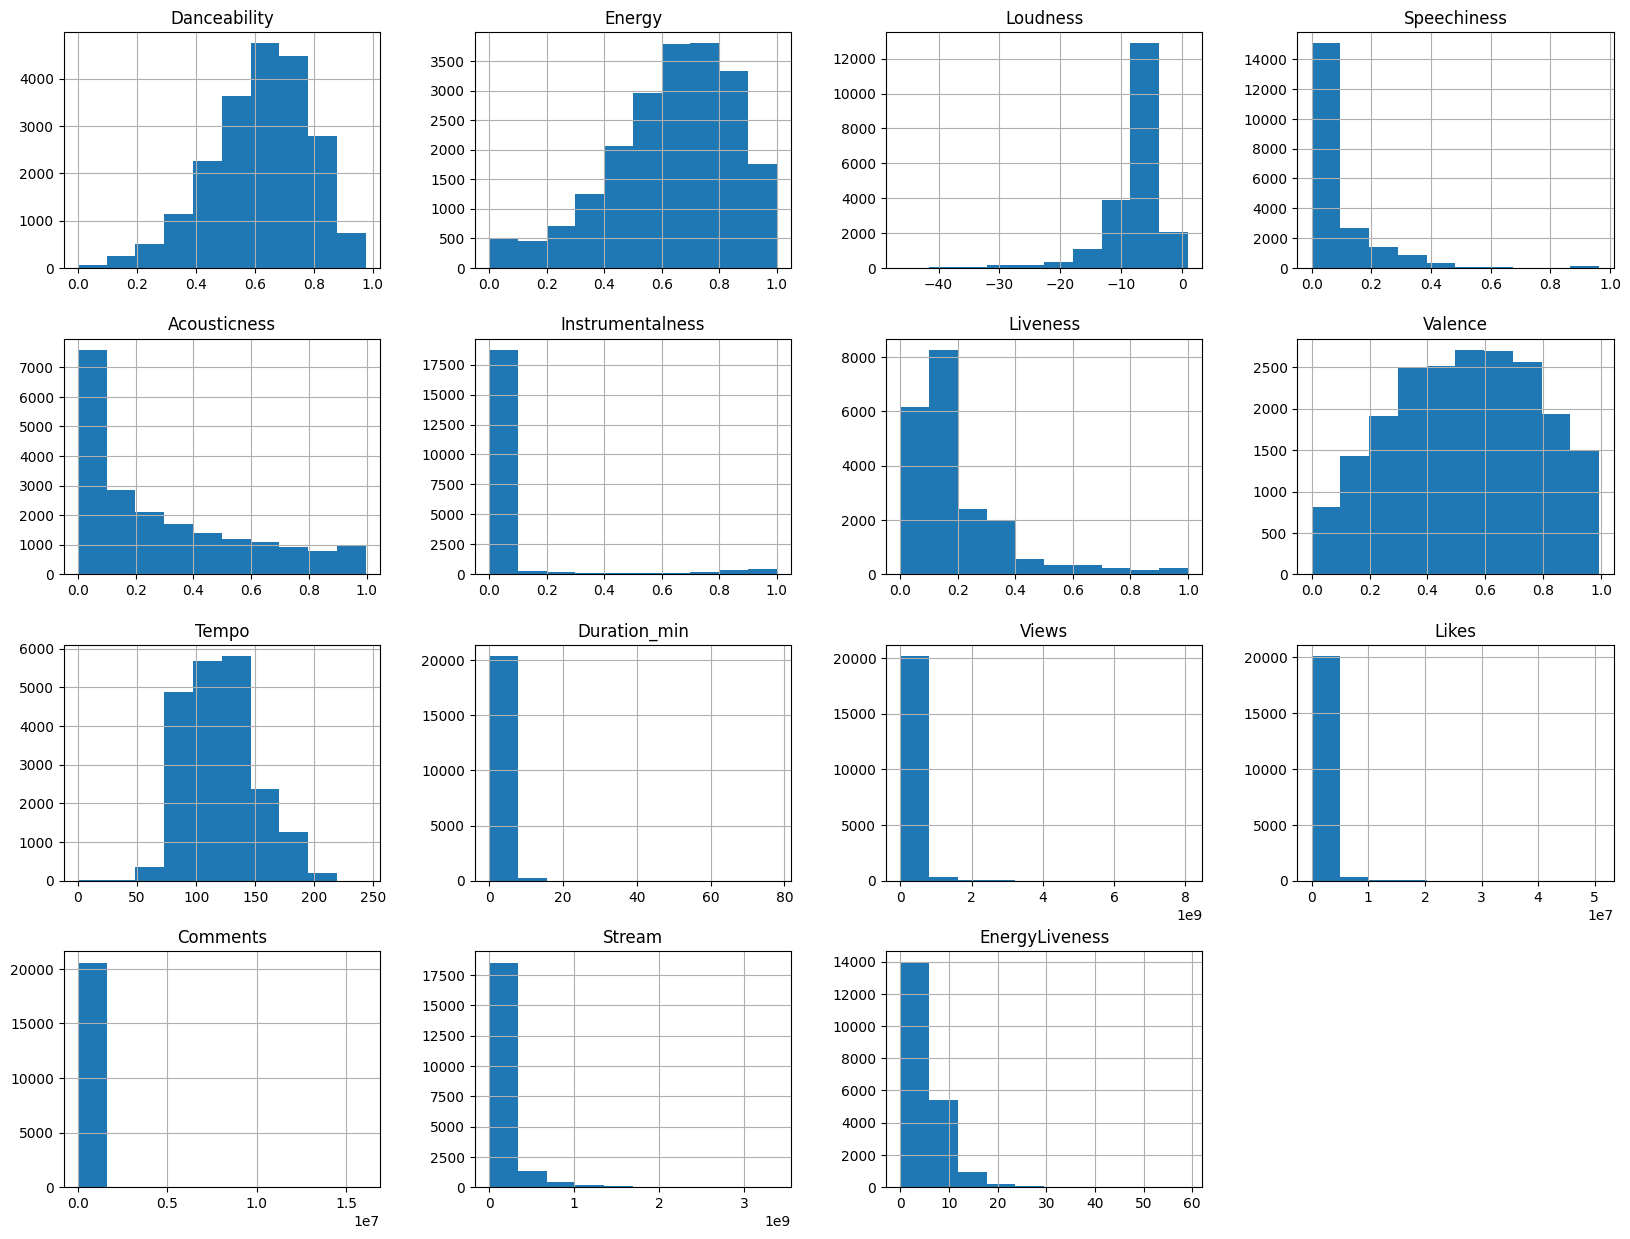

In [25]:
#Graficamos el histograma para comprender mejor los datos de las columnas
data.hist(figsize=(20,15))
plt.show()

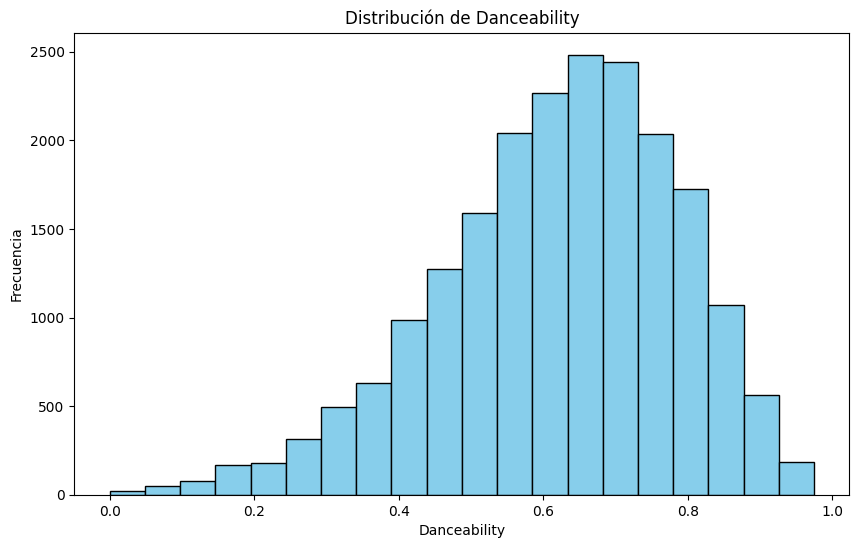

In [26]:
# 1. Histograma de Danceability
plt.figure(figsize=(10, 6))
plt.hist(df['Danceability'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribución de Danceability')
plt.xlabel('Danceability')
plt.ylabel('Frecuencia')
plt.show()

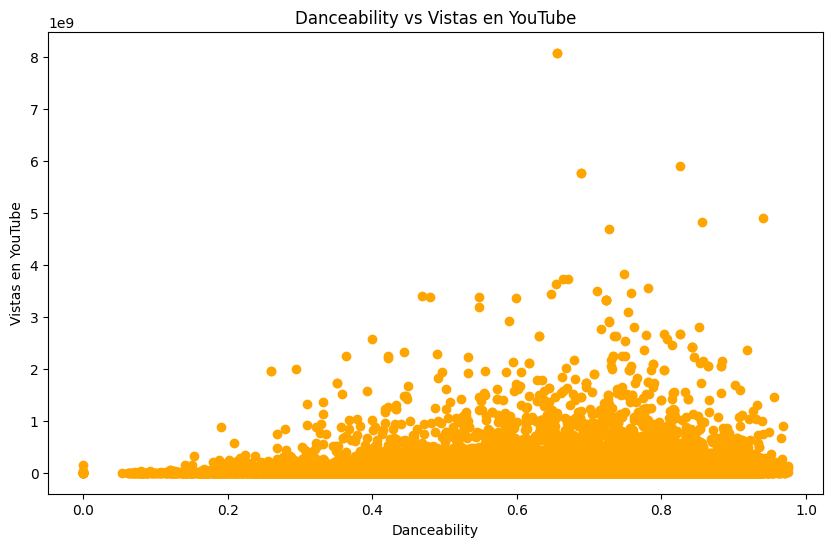

In [27]:
# 2. Scatter plot de Danceability vs Vistas en YouTube
plt.figure(figsize=(10, 6))
plt.scatter(df['Danceability'], df['Views'], color='orange')
plt.title('Danceability vs Vistas en YouTube')
plt.xlabel('Danceability')
plt.ylabel('Vistas en YouTube')
plt.show()

In [28]:
# 3. Boxplot de Energy por Canal
plt.figure(figsize=(12, 8))
sns.boxplot(x='Channel', y='Energy', data=df)
plt.title('Boxplot de Energy por Canal')
plt.xlabel('Canal')
plt.ylabel('Energy')
plt.show()


ValueError: 
Joey BadA$$ - Topic
         ^
ParseException: Expected end of text, found '$'  (at char 9), (line:1, col:10)

<Figure size 1200x800 with 1 Axes>

([<matplotlib.patches.Wedge at 0x215abb0cbd0>,
 [Text(0.413123224700171, 1.0194749635049074, 'Spotify'),
  Text(-0.41312341560043303, -1.019474886146114, 'Youtube')],
 [Text(0.22533994074554778, 0.5560772528208585, '37.7%'),
  Text(-0.22534004487296344, -0.556077210625153, '62.3%')])

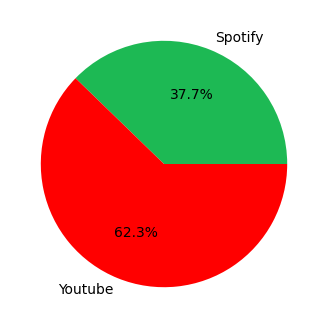

In [ ]:
#4. Piecharts suma de vistas por plataforma

vistas_plataforma = df.groupby('most_playedon')['Views'].sum().reset_index()

from matplotlib import colors

colores = ['#1db954','#ff0000']

fig,ax = plt.subplots(figsize =(8, 4))
ax.pie(vistas_plataforma['Views'], labels = vistas_plataforma['most_playedon'], autopct= '%1.1f%%', colors=colores)

                       Artist         Views
525                Ed Sheeran  1.546021e+10
374                 CoComelon  1.460167e+10
952                Katy Perry  1.312063e+10
333              Charlie Puth  1.216759e+10
1146               Luis Fonsi  1.162811e+10
924             Justin Bieber  1.099106e+10
422              Daddy Yankee  1.087193e+10
267                Bruno Mars  1.024092e+10
1181  Macklemore & Ryan Lewis  1.012206e+10
381                  Coldplay  9.997278e+09
293             Calvin Harris  9.758476e+09
151                 BLACKPINK  9.392962e+09
418                  DJ Snake  9.180268e+09
551                    Eminem  9.119324e+09
776           Imagine Dragons  9.093785e+09
558          Enrique Iglesias  8.860271e+09
1662                  Shakira  8.818140e+09
601             Fifth Harmony  8.574436e+09
1990              Wiz Khalifa  8.477702e+09
793                  J Balvin  8.464878e+09
1682                      Sia  8.441835e+09
1221                 Maroon 5  8

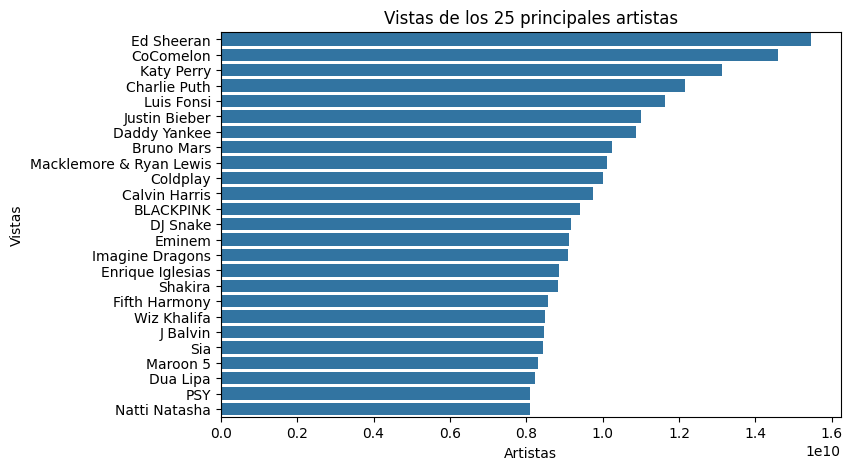

In [ ]:
#5. Gráfico de barras top 25 Artist

artistas= df.groupby('Artist')['Views'].sum().reset_index() #Suma de vistas por artista
artistas = artistas.sort_values(by='Views', ascending=False) #Ordenamiento de las vistas de forma ascendente
top25= artistas.head(25) #Selección del Top25 de artistas más vistos
print(top25)

plt.figure(figsize=(8,5))
sns.barplot(x='Views', y='Artist', data=top25)
plt.xlabel('Artistas')  # Etiqueta del eje X
plt.ylabel('Vistas')  # Etiqueta del eje Y
plt.title('Vistas de los 25 principales artistas')  # Título del gráfico
plt.show()

Gráficos con Seaborn

In [ ]:
# 1. Heatmap de correlación entre variables numéricas
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap de Correlación')
plt.show()

ValueError: could not convert string to float: 'Gorillaz'

<Figure size 1200x800 with 0 Axes>

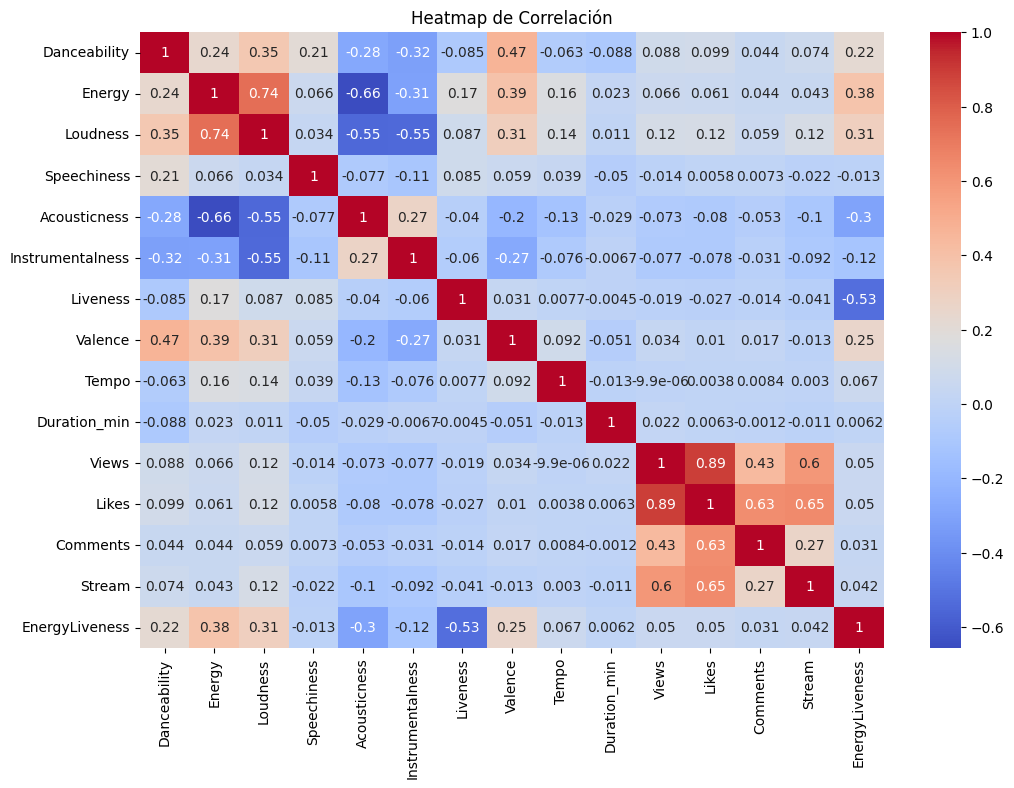

In [34]:
# Select only numeric columns
numeric_df = df.select_dtypes(include='number')

# Plot the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap de Correlación')
plt.show()

C:\Users\Alan\AppData\Local\Temp\ipykernel_22432\820215824.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Album_type', data=df, palette='viridis')


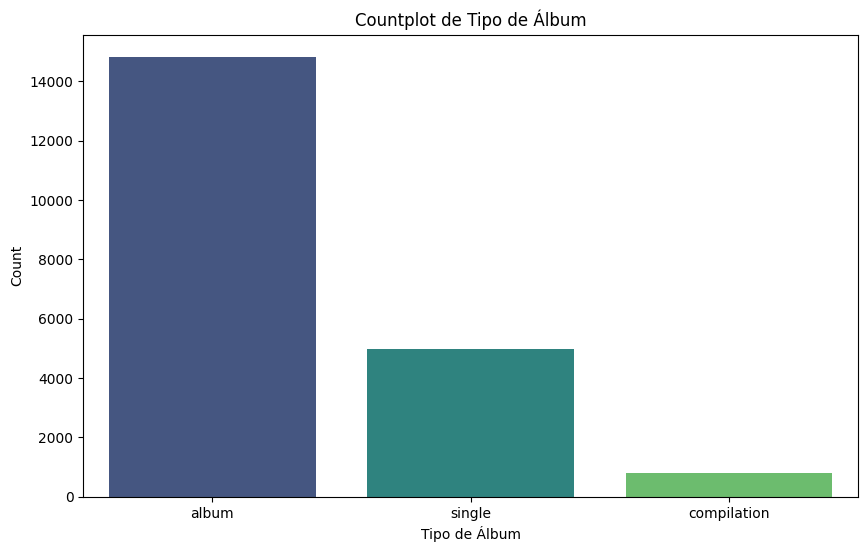

In [ ]:
# 2. Countplot de Album Type
plt.figure(figsize=(10, 6))
sns.countplot(x='Album_type', data=df, palette='viridis')
plt.title('Countplot de Tipo de Álbum')
plt.xlabel('Tipo de Álbum')
plt.ylabel('Count')
plt.show()

C:\Users\Alan\AppData\Local\Temp\ipykernel_22432\46593449.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Licensed', y='Valence', data=df, palette='pastel')


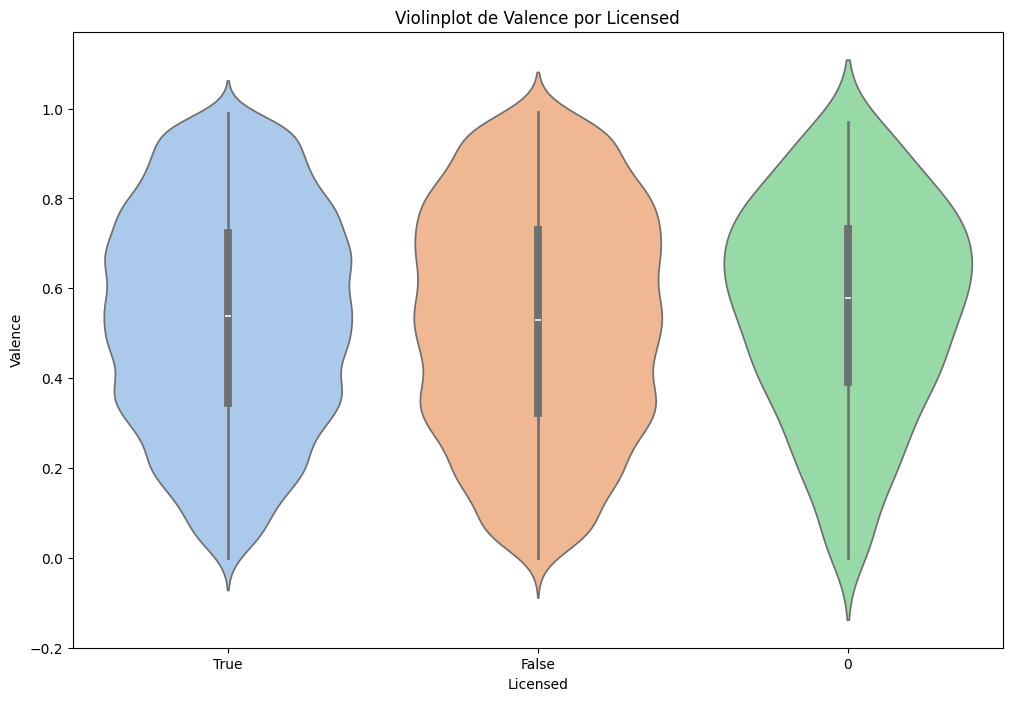

In [ ]:
# 3. Violinplot de Valence por Licensed
plt.figure(figsize=(12, 8))
sns.violinplot(x='Licensed', y='Valence', data=df, palette='pastel')
plt.title('Violinplot de Valence por Licensed')
plt.xlabel('Licensed')
plt.ylabel('Valence')
plt.show()

3er ENTREGA

Preguntas de interés o hipótesis:

1- Hipótesis sobre Popularidad y Características Musicales:
    ¿Existe una relación entre la "Danceability" y la popularidad de un video musical (medida por las vistas en YouTube)?
    ¿La "Energy" de una canción está relacionada con la cantidad de "Likes" que recibe?

2- Distribuciones y Tendencias:
    ¿Cómo se distribuyen las características musicales como "Danceability" y "Energy" en el conjunto de datos?
    ¿Hay una tendencia clara en la duración de las canciones?

3- Comparación entre Canales:
    ¿Existen diferencias significativas en la "Energy" de las canciones según el canal de publicación?
    ¿La "Valence" de las canciones varía entre los canales de YouTube y Spotify?

Visualizaciones y Resúmenes Numéricos:

1- Relación entre Danceability y Vistas en YouTube:
    Visualización: Scatter plot de "Danceability" vs "Views".
    Resumen numérico: Calcular la correlación entre estas dos variables.

2- Distribución de Energy y Duración:
    Visualización: Histograma y boxplot de "Energy" y "Duration_min".
    Resumen numérico: Estadísticas descriptivas de estas variables.

3- Comparación de Valence entre Canales:
    Visualización: Boxplot o violinplot de "Valence" para cada canal.
    Resumen numérico: Comparar medias o medianas de "Valence" entre los canales.



Visualización 1: Relación entre Danceability y Vistas en YouTube

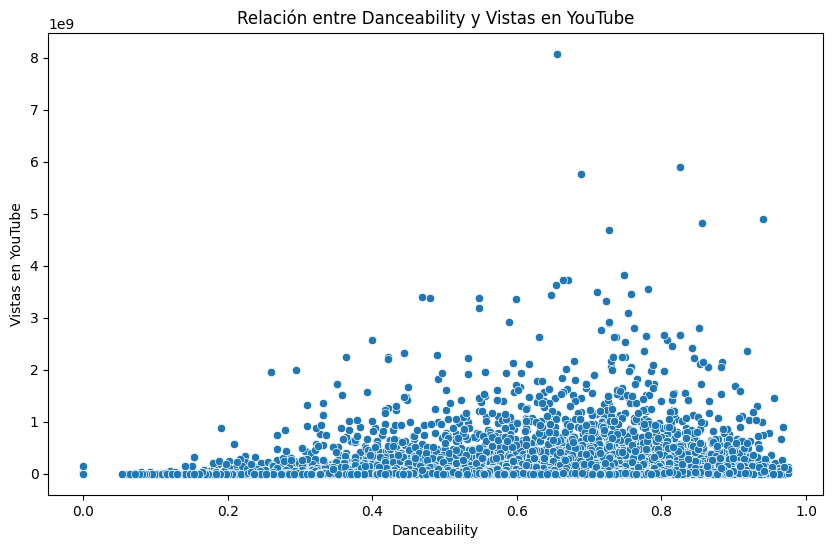

Correlación entre Danceability y Vistas en YouTube: 0.08818155643418865


In [ ]:
# Scatter plot Danceability vs Views
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Danceability', y='Views', data=df)
plt.title('Relación entre Danceability y Vistas en YouTube')
plt.xlabel('Danceability')
plt.ylabel('Vistas en YouTube')
plt.show()

# Resumen numérico
correlation_danceability_views = df['Danceability'].corr(df['Views'])
print(f'Correlación entre Danceability y Vistas en YouTube: {correlation_danceability_views}')

Visualización 2: Distribución de Energy y Duración

In [ ]:
df['Title'] = df['Title'].str.replace("$", "")

df['Channel'] = df['Channel'].str.replace("$", "")


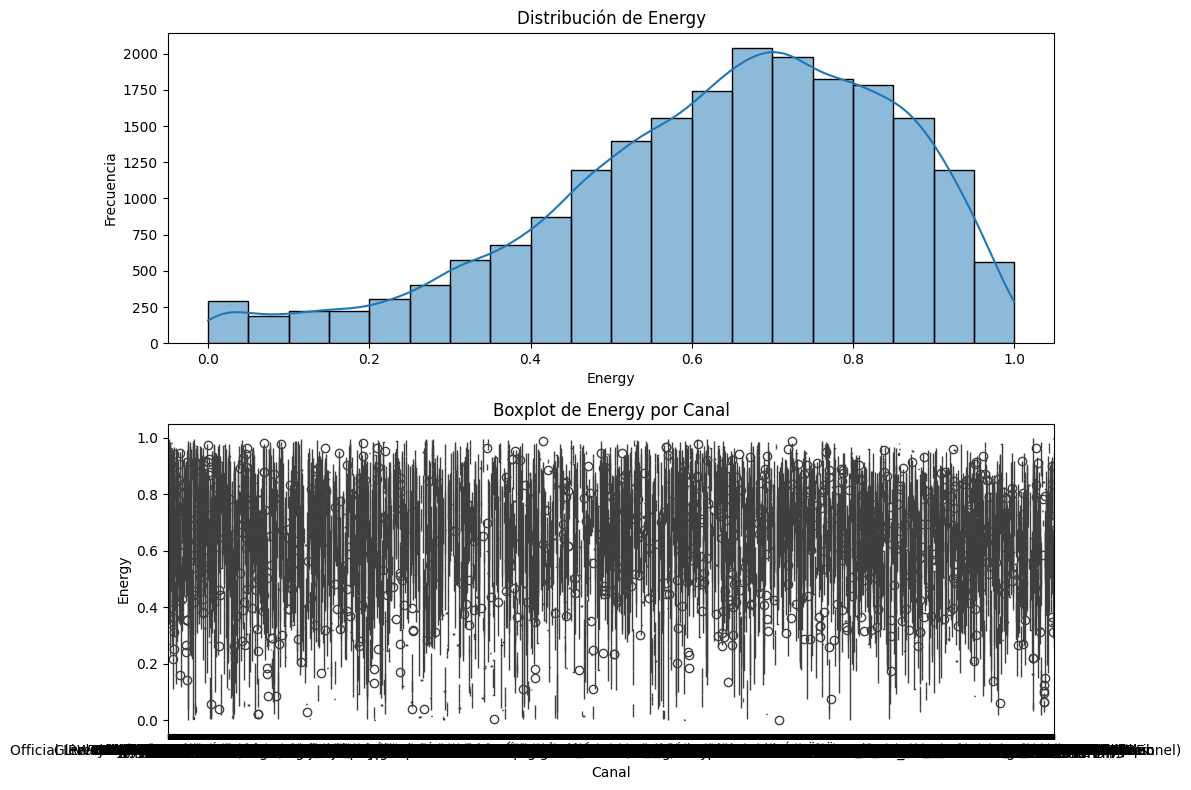

Resumen Numérico de Energy por Canal:
                                             count      mean       std  \
Channel                                                                  
 Khalkho 4119                                  1.0  0.673000       NaN   
(G)I-DLE (??)??? (Official YouTube Channel)    6.0  0.824667  0.073717   
* Harbrow *                                    1.0  0.162000       NaN   
*NSYNC - Topic                                 2.0  0.622500  0.135057   
0                                            469.0  0.646183  0.229004   
...                                            ...       ...       ...   
Ñengo Flow Tv                                  1.0  0.634000       NaN   
Özer Özgen                                     1.0  0.543000       NaN   
Øneheart                                       1.0  0.055100       NaN   
Øneheart - Topic                               1.0  0.204000       NaN   
•Random Popee????•                             1.0  0.464000       NaN   


In [ ]:
# Histograma y boxplot de Energy
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
sns.histplot(df['Energy'], bins=20, kde=True)
plt.title('Distribución de Energy')
plt.xlabel('Energy')
plt.ylabel('Frecuencia')

plt.subplot(2, 1, 2)
sns.boxplot(x='Channel', y='Energy', data=df)
plt.title('Boxplot de Energy por Canal')
plt.xlabel('Canal')
plt.ylabel('Energy')

plt.tight_layout()
plt.show()

# Resumen numérico
energy_summary = df.groupby('Channel')['Energy'].describe()
print('Resumen Numérico de Energy por Canal:')
print(energy_summary)


Visualización 3: Comparación de Valence entre Canales

In [ ]:
# Boxplot de Valence por Canal
plt.figure(figsize=(12, 8))
sns.boxplot(x='Channel', y='Valence', data=df)
plt.title('Boxplot de Valence por Canal')
plt.xlabel('Canal')
plt.ylabel('Valence')
plt.show()

# Resumen numérico
valence_summary = df.groupby('Channel')['Valence'].describe()
print('Resumen Numérico de Valence por Canal:')
print(valence_summary)


ValueError: 
Joey BadA$$ - Topic
         ^
ParseException: Expected end of text, found '$'  (at char 9), (line:1, col:10)

<Figure size 1200x800 with 1 Axes>

Resumen Numérico de Valence por Canal:
                                             count      mean       std  \
Channel                                                                  
 Khalkho 4119                                  1.0  0.393000       NaN   
$uicideboy$                                   12.0  0.516500  0.189727   
$uicideboy$ - Topic                            2.0  0.293000  0.142836   
(G)I-DLE (??)??? (Official YouTube Channel)    6.0  0.492333  0.236322   
* Harbrow *                                    1.0  0.052700       NaN   
...                                            ...       ...       ...   
Ñengo Flow Tv                                  1.0  0.533000       NaN   
Özer Özgen                                     1.0  0.311000       NaN   
Øneheart                                       1.0  0.039800       NaN   
Øneheart - Topic                               1.0  0.098800       NaN   
•Random Popee????•                             1.0  0.870000       NaN   

Interpretación de Resultados:

1- Relación Danceability y Vistas en YouTube:
    Si la correlación es positiva y significativa, podría indicar que canciones más bailables tienden a recibir más vistas en YouTube.

2- Distribución de Energy y Duración:
    La distribución de "Energy" podría indicar el nivel de energía predominante en las canciones. Un mayor rango en "Duration_min" podría indicar diversidad en la duración de las canciones.

3- Comparación de Valence entre Canales:
    Si hay diferencias significativas en la "Valence" entre canales, podría sugerir preferencias de contenido emocional entre plataformas.

4ta ENTREGA

Abstracto:

La motivación de este proyecto es explorar las relaciones entre las características musicales y la popularidad de videos musicales en diferentes plataformas, centrándose en YouTube y Spotify. La audiencia objetivo incluye expertos en análisis de datos y profesionales de la industria musical interesados en comprender los factores que contribuyen al éxito de un video musical en términos de vistas y likes.

Definición de Objetivo:

El objetivo principal es identificar patrones y tendencias en los datos musicales para comprender cómo ciertas características, como la danceability, energy, y valence, se relacionan con la popularidad de los videos musicales en YouTube y Spotify. Esto permitirá proporcionar recomendaciones a artistas y sellos discográficos sobre qué aspectos de una canción podrían influir en su éxito en estas plataformas.

Contexto Comercial:

La industria musical es altamente competitiva, y comprender los factores que impulsan la popularidad de un video musical puede ser crucial para la toma de decisiones estratégicas. Los artistas y sellos discográficos buscan maximizar la visibilidad y el impacto de sus lanzamientos, y este análisis podría proporcionar insights valiosos para optimizar la producción y promoción de contenido musical.

Problema Comercial:

El problema comercial radica en la necesidad de entender qué características musicales específicas pueden influir en la popularidad de un video musical en plataformas de transmisión como YouTube y Spotify. La falta de esta comprensión puede llevar a decisiones de inversión y estrategias promocionales subóptimas.

Contexto Analítico:

Para abordar este problema, se realizará un análisis exploratorio de datos (EDA) utilizando visualizaciones y resúmenes numéricos. Se emplearán técnicas estadísticas y de visualización para identificar patrones, correlaciones y tendencias en los datos.

Análisis Exploratorio de Datos (EDA):

Se han realizado visualizaciones y resúmenes numéricos para explorar las relaciones entre danceability, energy, valence, y la popularidad en YouTube. Se han identificado patrones y tendencias preliminares que ahora se analizarán más detenidamente.

Recomendaciones Basadas en Insights:

Optimización de Danceability:

Si la hipótesis 1 se confirma, se recomienda a los artistas y sellos discográficos enfocarse en la danceability al producir música para plataformas como YouTube.

Consideración de Energy para Likes:

Si la hipótesis 2 se confirma, se sugiere que la energy de una canción podría influir en la cantidad de likes en YouTube, por lo que los artistas podrían ajustar la energía de sus canciones en función de sus objetivos de engagement.

Diferencias en Valence por Canal:

Si se confirma la diferencia significativa en la valence entre canales, los artistas podrían adaptar el tono emocional de sus canciones según la plataforma de publicación.

5ta ENTREGA

Feature Selection:

In [37]:
from sklearn.ensemble import RandomForestRegressor

# Separar variables predictoras (X) y variable objetivo (y)
X = df.drop(['Views'], axis=1)  # Excluir la variable objetivo 'Views'
y = df['Views']

# Inicializar el modelo de RandomForestRegressor
rf_model = RandomForestRegressor()

# Ajustar el modelo a los datos para calcular la importancia de las características
rf_model.fit(X, y)

# Obtener la importancia de las características
feature_importances = rf_model.feature_importances_

# Crear un DataFrame con las características y su importancia
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Ordenar las características por importancia descendente
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Seleccionar las top N características (por ejemplo, las 5 más importantes)
top_features = feature_importance_df.head(5)['Feature'].tolist()

# Crear un nuevo DataFrame con las características seleccionadas
df_selected_features = df[top_features]


ValueError: could not convert string to float: 'Gorillaz'

Elección de un algoritmo de regresión o clasificación:

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(df_selected_features, y, test_size=0.2, random_state=42)

# Inicializar el modelo de RandomForestRegressor
reg_model = RandomForestRegressor()

# Ajustar el modelo a los datos de entrenamiento
reg_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = reg_model.predict(X_test)

# Calcular la métrica (por ejemplo, Mean Squared Error)
mse = mean_squared_error(y_test, y_pred)

# Mostrar la métrica
print(f'Mean Squared Error: {mse}')


NameError: name 'df_selected_features' is not defined

Desafío complementario

 Generar una evaluación de modelos apropiados para el problema de interés:

In [3]:
# Feature selection using RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

# Separate predictor variables (X) and target variable (y)
X = df.drop(['Views'], axis=1)  # Exclude the target variable 'Views'
y = df['Views']

# Initialize the RandomForestRegressor model
rf_model = RandomForestRegressor()

# Fit the model to the data to calculate feature importances
rf_model.fit(X, y)

# Get feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame with features and their importance
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Select the top N features (for example, the top 5)
top_features = feature_importance_df.head(5)['Feature'].tolist()

# Create a new DataFrame with selected features
df_selected_features = df[top_features]


NameError: name 'df' is not defined

In [1]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

# Definir modelos
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(),
    'Support Vector Regression': SVR()
}

# Evaluar modelos con validación cruzada
for model_name, model in models.items():
    scores = cross_val_score(model, df_selected_features, y, cv=5, scoring='neg_mean_squared_error')
    rmse_scores = (-scores) ** 0.5
    print(f'{model_name}: Mean RMSE across folds: {rmse_scores.mean()}, Std: {rmse_scores.std()}')


NameError: name 'df_selected_features' is not defined